In [2]:
# -*- coding: utf-8 -*-
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pylab,six,matplotlib 
from matplotlib import markers,lines,colors
from scipy import interpolate
mk=np.tile(markers.MarkerStyle.filled_markers,3)
ck=list(six.iteritems(colors.cnames))
matplotlib.rc('font',family='serif',size=9)
from matplotlib2tikz import save as tikz_save
import ht

lk = np.tile(['-', '--', '-.', ':'],4)
mk=np.tile(['o','s','<','D','>','h','p','x','d','^'],3)
ck= plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
mpl.rcParams['xtick.labelsize'] = 16;
mpl.rcParams['xtick.labelsize'] = 16;
mpl.rcParams['ytick.labelsize'] = 16;
mpl.rcParams['font.family'] = 'serif';
mpl.rcParams['axes.labelsize'] = 16

In [3]:
from __future__ import division
from math import sin, pi, log
from fluids.constants import g, R
from fluids.core import Reynolds, Prandtl
from ht.conv_internal import turbulent_Dittus_Boelter
import ht

__all__ = ['Boyko_Kruzhilin', 'Nusselt_laminar', 'h_kinetic', 
           'Akers_Deans_Crosser', 'Cavallini_Smith_Zecchin', 'Shah']

### Ebullición nucleada 
De acuerdo a Rohsenow, Warren M. "A Method of Correlating Heat Transfer Data for
Surface Boiling of Liquids." Technical Report. Cambridge, Mass. : M.I.T. Division of Industrial Cooporation, 1951
   
Las entradas son flujo de calor o exceso de temperatura.
    
A partir de $\Delta T$
\begin{equation}    
h = {{\mu }_{L}} \Delta H_{vap} \left[ \frac{g( \rho_L-\rho_v)}
{\sigma } \right]^{0.5}\left[\frac{C_{p,L}\Delta T_e^{2/3}}{C_{sf}
\Delta H_{vap} Pr_L^n}\right]^3
\end{equation}
    
A partir de $q$:
    
\begin{equation}
h = \left({{\mu }_{L}} \Delta H_{vap} \left[ \frac{g( \rho_L-\rho_v)}
{\sigma } \right]^{0.5}\left[\frac{C_{p,L}\Delta T_e^{2/3}}{C_{sf}
\Delta H_{vap} Pr_L^n}\right]^3\right)^{1/3}q^{2/3}
\end{equation}
    
    Parameters
    ----------
    rhol : Densidad del líquido [kg/m^3]
    rhog : Densidad del vapor [kg/m^3]
    mul : Viscosidad del líquido [Pa*s]
    kl : Conductividad térmica del líquido [W/m/K]
    Cpl : Calor específico del líquido [J/kg/K]
    Hvap : Calor latente de vaporización a una presión P [J/kg]
    sigma : Tensión superficial del líquido  [N/m]
    Te : Exceso de temperatura de pared [K]
    q : Flujo de calor [W/m^2]
    Csf : Coeficiente de Rosenhow, dependiente del fluido y del metal calefactor [-]
    n : Constante, 1 for agua, 1.7 (defecto) para otros fluidos [-]

    Salida
    -------
    h : Coeficiente del transferencia de calor [W/m^2/K]

In [6]:
ht.Rohsenow(rhol=957.854, rhog=0.595593, mul=2.79E-4, kl=0.680, Cpl=4217, Hvap=2.257E6, 
         sigma=0.0589, Te=4.9, Csf=0.011, n=1.26)


3723.655267067467

In [7]:
ht.Rohsenow(rhol=957.854, rhog=0.595593, mul=2.79E-4, kl=0.680, Cpl=4217, Hvap=2.257E6, 
         sigma=0.0589, q=2000, Csf=0.011, n=1.26)

852.8626581213597

In [18]:
Temps = np.linspace(10,100,100)
h_nucl = []
for Tempsi in Temps:
    h_nucl.append(ht.Rohsenow(rhol=957.854, rhog=0.595593, mul=2.79E-4, kl=0.680, Cpl=4217, Hvap=2.257E6, 
         sigma=0.0589, Te=Tempsi, Csf=0.011, n=1.26))

<IPython.core.display.Javascript object>


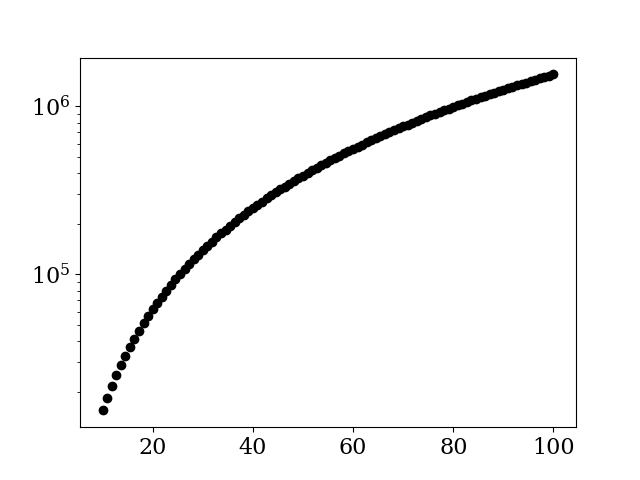

In [19]:
fig0,ax0 = plt.subplots()
ax0.semilogy(Temps,h_nucl,'ko')

In [24]:
ht.Akers_Deans_Crosser(m=0.35, rhog=6.36, rhol=582.9, kl=0.098, mul=159E-6, Cpl=2520., D=0.03, x=0.85)

7117.24177265201

Más correlaciones en el siguiente enlace https://ht.readthedocs.io/en/latest/_modules/ht/condensation.html